# Statistical Methods Using Python for Analyzing Stocks

Abstract Statistical Methods are part of the tools for analyzing securities. The following chapter explains the central limit theorem, returns, ranges, boxplots, histograms and other sets of statistical measures for the analysis of securities using Yahoo Finance API.

Keywords Central limit theorem · Returns · Plots · Statistical measures

This next part of the book is centered on the use of mathematical and statistical methods to understand the security based on quantitative analysis. The aim of quantitative analysis is to extract a value that explains financial behavior (Keaton 2019).

## The Central Limit Theorem

The Central Limit Theorem (CLT) is part of the study concerning probability theory which states that if random samples of a certain size (n) from any population, the sample will approach a normal distribution. A normal distribution happens when there is no left or right bias in the
data (Ganti 2019).

The usual representation of a normal distribution is the Bell Curve which looks lithe a bell, hence the name. CLT establishes that given a sufficiently large sample size from a population with a specific amount of variance that is finite, the mean is equal to the median and equal to the mode. The meaning of this is that there is complete symmetry in the data and that 50% of the values are higher than the mean and 50% are lower than the mean.

The mean is usually divided into two: (1) population mean and (2) sample mean. These aspects are important when analyzing the data that is going to be used. The formulas give information regarding these aspects:


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,1,1)
IBM = yf.download('IBM', start, end)

[*********************100%%**********************]  1 of 1 completed


Given that the information used for the IBM security is from January 1st, 2015 to January 1, 2019, this is considered as a sample. Therefore, the x¯ will be considered as the mean of the security. To calculate the mean, as the equation suggests, it is the sum of the elements divided by
the count of the elements.


In [2]:
print(IBM['Close'].mean())

145.16948027260023


The other aspect mentioned on the CLT is the median. The median is the middle value of the set of numbers. To calculate the median in Python it should be calculated as follows:

In [3]:
print(IBM['Close'].median())

145.79827880859375


Which one to choose? The rule of thumb is to use the mean when there are no outliers and to use the median when there are outliers.

The third measure of the CLT is the mode. The mode is the most frequent point of data in our data set. In a histogram, it is the highest bar.

To calculate it in Python:

In [4]:
print(IBM['Close'].mode())

IBM['Close'].describe()

0    140.038239
Name: Close, dtype: float64


count    1006.000000
mean      145.169480
std        12.793130
min       102.839386
25%       138.499046
50%       145.798279
75%       153.319794
max       173.948380
Name: Close, dtype: float64

## Creating a Histogram

One of the most important plots to display information in finance is a histogram. A histogram demonstrates the frequency of data that is continuous. The meaning of statistical frequency is the times that a value occurs on a set of data. Continuous, refers to continuous data, which means that the data can take any value within a range.

The histogram for analyzing security has to be elaborated with the total security return. To calculate the total stock return, the following formula will be used:

[*********************100%%**********************]  1 of 1 completed

Date
2015-01-02         NaN
2015-01-05   -0.015735
2015-01-06   -0.021566
2015-01-07   -0.006536
2015-01-08    0.021735
                ...   
2018-12-24   -0.030377
2018-12-26    0.035512
2018-12-27    0.021456
2018-12-28   -0.006592
2018-12-31    0.005662
Name: Close, Length: 1006, dtype: float64


<Axes: >

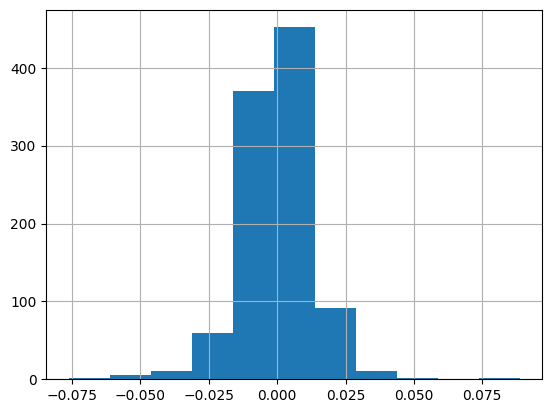

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,1,1)
IBM = yf.download('IBM', start, end)

IBM_returns=IBM['Close'].pct_change()
print(IBM_returns)
IBM_returns.describe()

IBM_returns.hist(bins=11)


The IBM_returns reflects the change in an IBM price. The pct_change is part of Pandas that gives the percentage of change between the current and prior number. By establishing the number one (1) it compares the actual price with the price before.

The IBM_returns can now be converted into a histogram. For this the matplotlib.pyplot.hist will be used. One of the most important attributes of hist is the number of bins. The number of bins has as a Rule of Thumb the Sturge’s Rule.

<Axes: >

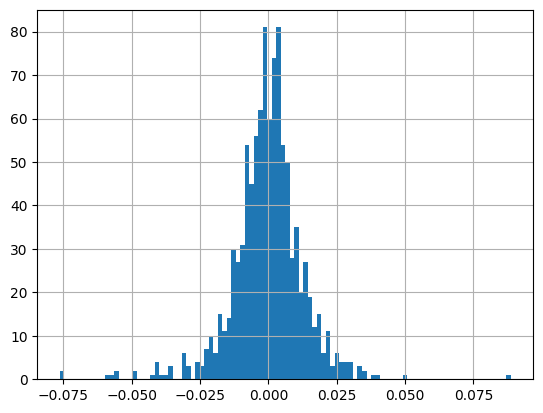

In [6]:
IBM_returns.hist(bins=100)

## Equation 5: Logarithmic return equation

ln = Natural Logarithm

P1=Actual Price

P0=Previous Price

To achieve this in Python, it is necessary to use the shift and the np.log.

The shift is used to move the calculation by one value, hence the name.

The np.log returns the natural logarithm with a base e. Both of them are necessary to use in order to calculate the logarithmic returns.

[*********************100%%**********************]  1 of 1 completed


<Axes: >

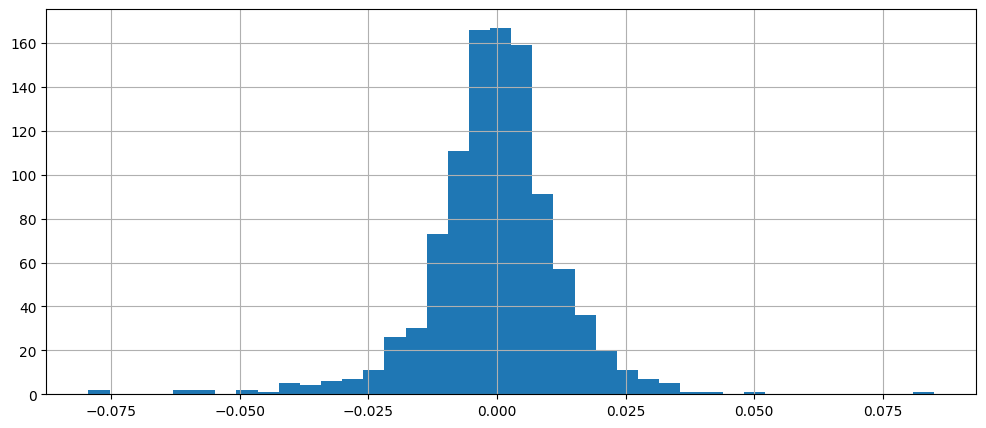

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,1,1)
IBM = yf.download('IBM', start, end)

IBM_log_returns = np.log(IBM['Close'] / IBM['Close'].shift(1))
IBM_log_returns.hist(bins=40, figsize=(12,5))

## CreatIng a histogram with line plots

The above results can be charted into the histogram and the line plot. To add the results into the histogram an axvline can be added as a part of the plot.

The axvline allows a line to be created to define the plot. In the script, the mean and the median of the logarithmic returns have been added (Fig. 7).

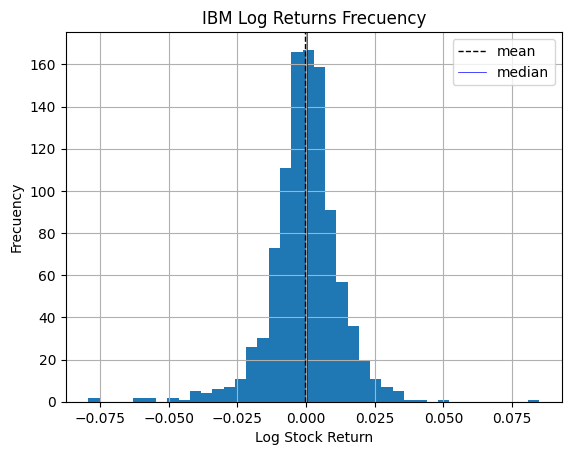

In [8]:
IBM_log_returns.hist(bins=40)
_=plt.xlabel('Log Stock Return')
_=plt.ylabel('Frecuency')
_=plt.title('IBM Log Returns Frecuency')
_=plt.axvline(IBM_log_returns.mean(), color='k', linestyle='dashed', linewidth=1, label='mean')
_=plt.axvline(IBM_log_returns.median(), color='b', linewidth=0.5, label='median')
plt.legend()

The plt.axvline was created with the mean function and with the median function. The color was modified and a label was added so that the legend becomes useful when analyzing the data. Given that the mean and the median are very similar, there is almost no difference in the graph but in extreme cases the difference between the mean and the median can be considerable.

For this, it is necessary to discuss about skewness. Since it is important to understand symmetry, skewness is useful as a measure for understanding the lack of symmetry. When talking about skewness, the information can be skewed to the left, to the right or be at the center point (Jain 2018).

IBM_log_returns.skew()

In [9]:
IBM_log_returns.skew()

-0.6582895096911849

The skewness for a normal distribution should be zero and the symmetric data should be near this number.

• If the values are positive: data is skewed to the right

• If the values are negative: data is skewed to the left

In the example of IBM, it can be concluded that the data is skewed to the left and that is near zero which leads to being considered symmetric.

Conjointly with measuring skewness it is important to measure kurtosis. Kurtosis is the measure of the tails in a normal distribution (Kenton 2019). A high kurtosis is related to having heavy tails, which means outliers. A low kurtosis means lack of outliers which is light tails.

It is uncommon to have a uniform distribution. To obtain a kurtosis in Python, the command should be as follows:

IBM_log_returns.kurtosis()

In [10]:
IBM_log_returns.kurtosis()

6.257142458760564

There are three options of kurtosis for interpreting the result.

- **Leptokurtic:** the value of kurtosis is greater than (>) than zero. The interpretation is that the data is centered around the mean.

- **Mesokurtic:** the value of the kurtosis is equal (=) to zero. This represents a normal distribution

- **Platykurtic:** the value of the kurtosis is less than (<) than zero. The

interpretation is that the data is far from the mean. In the example of IBM, the kurtosis is leptokurtic, since the values are around the mean and the shape of the bell is taller in its area.

## Histograms Using f.fn()

To create a histogram with one variable with the use of f.fn() the process is as follows:

### Histogram (percent change) with two variables

The next process is to analyze return by creating a histogram that can be compared between two companies.

• Installing packages

In [11]:
import yfinance as yfin
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2014,1,1)
end = datetime.datetime(2019,1,1)

CocaCola = yfin.download('K', start, end)
Pepsi = yfin.download('PEP', start, end)

Pepsi['Returns']=Pepsi['Close'].pct_change(1)
CocaCola['Returns']=CocaCola['Close'].pct_change(1)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


One of the columns are created by the append method. The histogram for both companies can be elaborated as follows (Fig. 8):

• Creating a histogram

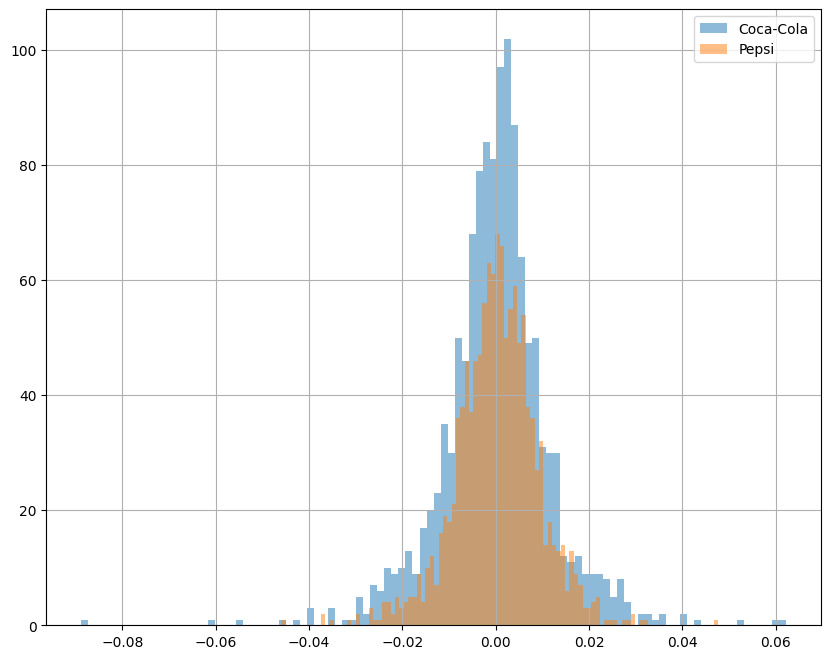

In [12]:
CocaCola['Returns'].hist(bins=100 , label='Coca-Cola', alpha=0.5)
Pepsi['Returns'].hist(bins=100, label='Pepsi', figsize=(10,8), alpha=0.5)
plt.legend()

## Histogram (logarithmic return) with two variables

The process for creating a comparison with two companies concerning logarithmic returns is the same as the process for one company. 

To create logarithmic returns using the append method, it can be done as follows (Fig. 9):

• Calculating logarithmic returns

In [13]:
Pepsi['LN Returns']=np.log(Pepsi['Close'] / Pepsi['Close'].shift(1))
CocaCola['LN Returns']=np.log(CocaCola['Close'] / CocaCola['Close'].shift(1)) 

• Creating a histogram


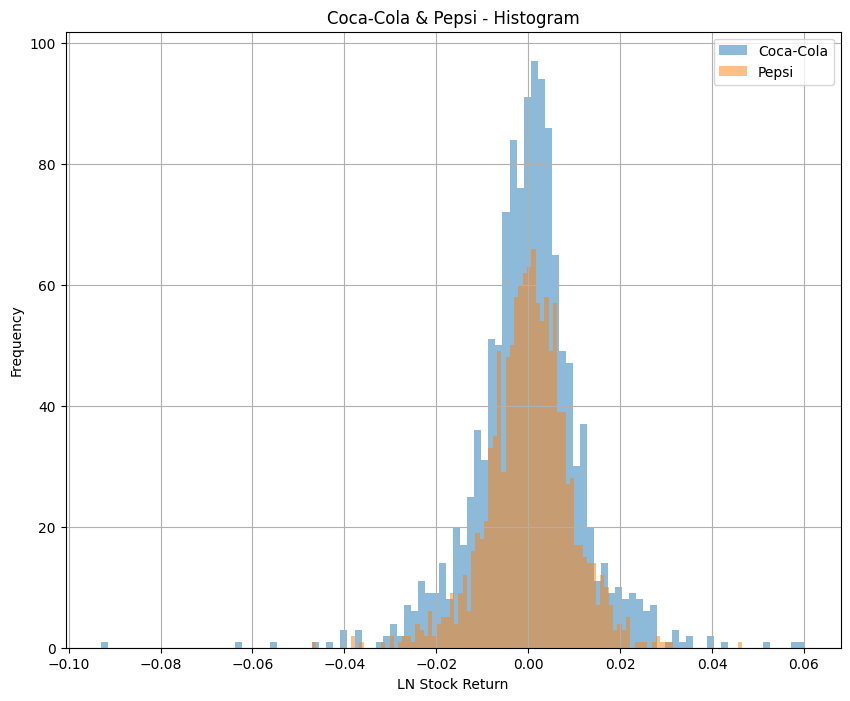

In [14]:
CocaCola['LN Returns'].hist(bins=100, label='Coca-Cola', alpha=0.5)
Pepsi['LN Returns'].hist(bins=100, label='Pepsi', figsize=(10,8), alpha=0.5)
_=plt.xlabel('LN Stock Return')
_=plt.ylabel('Frequency')
_=plt.title('Coca-Cola & Pepsi - Histogram')
plt.legend()

## Interquartile range and Boxplots

In finance, it is extremely important to measure the spread of data. The first aspect for measuring the spread of data is the range. The range, as seen before, is the difference between the highest and lowest values (Kalla 2020). This is important because it helps in understanding where the values of the data are located. For calculating the range, the max and min functions can be used.

range_returns = IBM_close.max() - IBM_close.min()
range_returns

* Result

In [15]:
IBM_close = IBM['Close']
range_returns = IBM_close.max() - IBM_close.min()
print(IBM_close.max())
print(IBM_close.min())
range_returns

173.94837951660156
102.83938598632812


71.10899353027344

Another important range measure is the Interquartile range (IQR).

The interquartile range is the distance between the third quartile (Q3) and the first quartile (Q1) (Wan et al. 2014). The Q1 should be understood as one-fourth (25%) of the data is the same or less than the Q1 result. The Q3 should be understood as three-fourths (75%) of the data is the same or the Q3 result.

The measure is important for understanding outliers. The rule of thumb is that if a value is larger than Q3 plus 1.5 times the IQR, then this value is an outlier. This also applies if the value is Q1 minus 1.5 times the IQR range.

Equation 6: IQR formula

IQR = Q3 − Q1

Outliers

- If datapoint > Q3 + 1.5 × IQR

- If datapoint < Q1 − 1.5 × IQR

In Python the IQR can be calculated as follows:

In [16]:
IBM_Q1 = IBM_close.quantile(0.25)
print(IBM_Q1)

IBM_Q3 = IBM_close.quantile(0.75)
print(IBM_Q3)

IBM_IQR = IBM_Q3 - IBM_Q1
print(IBM_IQR)

IBM_outlier_high = IBM_Q3 + 1.5 * IBM_IQR
print(IBM_outlier_high)

IBM_outlier_low = IBM_Q1 - 1.5 * IBM_IQR
print(IBM_outlier_low)



138.4990463256836
153.31979370117188
14.820747375488281
175.5509147644043
116.26792526245117


Given the result, there are outliers in the lower range, given that the minimum value of the is 74.38 and the low outlier is 121.55. There is an intense discussion about removing outliers, or retaining them considering that outliers are useful. For the present moment, the outliers should be kept.

The visualization for analyzing outliers is the boxplots. The boxplots are also known as the box-whisker plots and they are useful to understand the concentration of the data. To create a boxplot the information needed is as follows:

- • Minimum value outlier
- • Q1
- • Median
- • Q3
- • Max value outlier

To create a boxplot in Python (Fig. 10):

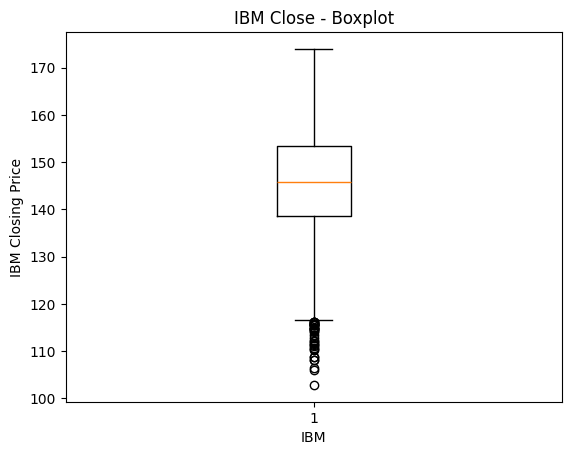

In [17]:
plt.boxplot(IBM_close)
_=plt.ylabel('IBM Closing Price')
_=plt.title('IBM Close - Boxplot')
_=plt.xlabel('IBM')


As the boxplot demonstrates, the highest value for measuring an outlier is 183.65. The beginning of the box below the max value is
Q3 (160.35). The orange line in the middle of the box is the median (152.5). Below is the Q1 range (144.84) and the last line is the smallest value for measuring an outlier (121.55). The white and black points are the outlier of the series, just as calculated by the IQR range and the rule of thumb for outliers.

## Boxplot with two variables

The creation of a Box-Plot is certainly complicated. For instance, both variables, Pepsi['Close'] and CocaCola['Close'], have to be included in the same variable. The reason for uniting both variables is that if the process is not done with concatenation, the boxplot will be graphed as one above the other. To concatenate the pd.concat function of Pandas is extremely useful (Fig. 11).

• Installing packages

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


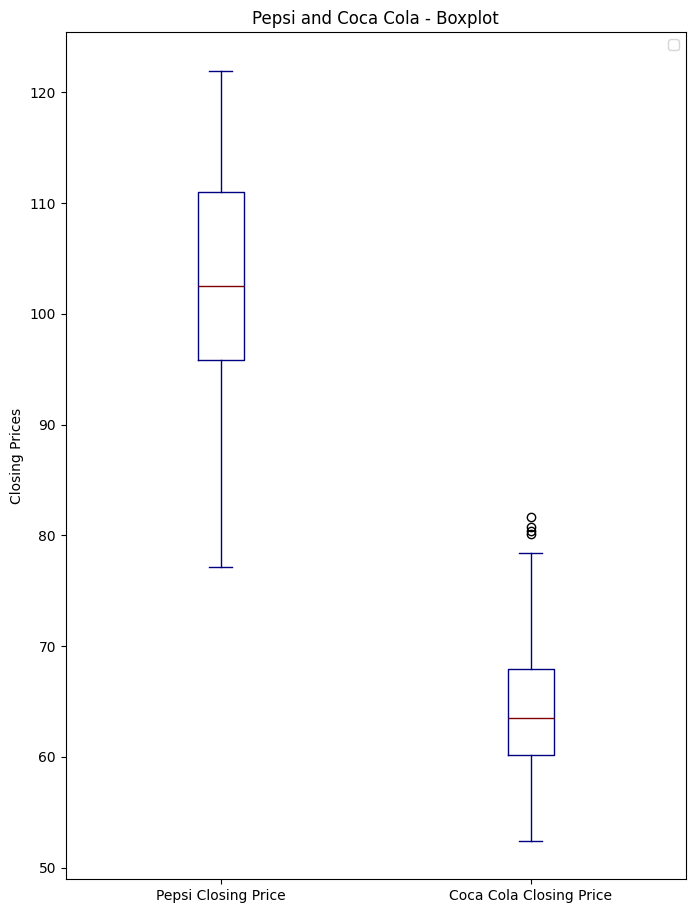

In [18]:
import yfinance as yfin
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2014,1,1)
end = datetime.datetime(2019,1,1)

CocaCola = yfin.download('K', start, end)
Pepsi = yfin.download('PEP', start, end)

united_box = pd.concat([Pepsi['Close'], CocaCola['Close']],axis=1)
united_box.columns=['Pepsi Closing Price', 'Coca Cola Closing Price']

united_box.plot(kind='box', figsize=(8,11), colormap='jet')
_=plt.ylabel('Closing Prices')
_=plt.title('Pepsi and Coca Cola - Boxplot')
_=plt.legend()



The boxplot demonstrates the outliers concerning Coca-Cola and Pepsi, as well as the range of the prices. Considering that Pepsi’s closing prices are higher, this creates an important difference between the height of the graphs. It is important to consider that the information selected can be applied to more than two variables.

## Kernel density plot and volatility

Although the IQR range is important, there are other elements that measure the spread of data that are vital in finance:
(1) variation and
(2) standard deviation. 

Variance measures the spread between the numbers of the data set (Hayes 2019). The formula is as follows:

Equation 7: Variance formula

x = data point
x¯= mean of the data points in the series
n = total of data points

In [19]:
import yfinance as yfin
import numpy as np
import pandas as pd
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,1,1)

IBM = yfin.download('IBM', start, end)

IBM_log_returns = np.log(IBM['Close'] / IBM['Close'].shift(1))

print(IBM_log_returns.var())


[*********************100%%**********************]  1 of 1 completed

0.0001710061005830355


The interpretation of the number should be based on a large or small variance. In finance, a high variance can be led to a riskier asset, meanwhile, a low variance should be interpreted as a low-risk asset. For a more accurate analysis the standard deviation is used.

Equation 8: Standard deviation equation

x = data point

x¯ = mean of the data points in the series

n = total of data points

The standard deviation measures the dispersion of the data set to its mean. The standard deviation in finance is often referred to as volatility (Hargrave 2020). Volatility is important because when analyzing higher volatility, it is usually related to risk. In python it should be computed as follows:

In [20]:
print(IBM_log_returns.std())

0.013076930090163957


Since the standard deviation cannot be negative (because it uses absolute values) and the smallest standard deviation possible is zero, the standard deviation of IBM logarithmic returns can be seen as a small variation and therefore, a less risky asset. For this it is important to compare IBM to other companies.

There is a discussion concerning standard deviation, variance and IQR range. The main comment is that standard deviation and variance are affected by outliers and therefore, it can be inaccurate. Since IQR range considers the identification of assets, and it is sometimes seen as a better measure. Even so, standard deviation and variance are commonly used in finance.

Finally, one last statistical tool is the Kernel Density Estimation better known as the KDE. The KDE plot is usually a replacement for the histogram because it is calculated by applying a weight to the distance between points in the dataset. The weighing of distance is achieved by the following formula:

## Equation 9: Kernel density estimation—weighting

The Kernel function can be an Epanechnikov, normal, uniform or triangular. The Pandas data frame kde uses the scott rule7 which is equivalent to the proposal of D.W Scott which establishes an approach to a normal density.

In conclusion, a KDE is a smoother version of the histogram and can be compared easily. It is usually graphed with the histogram to compare the behavior of the variable. In the exercise below it has been plotted individually (Fig. 12):

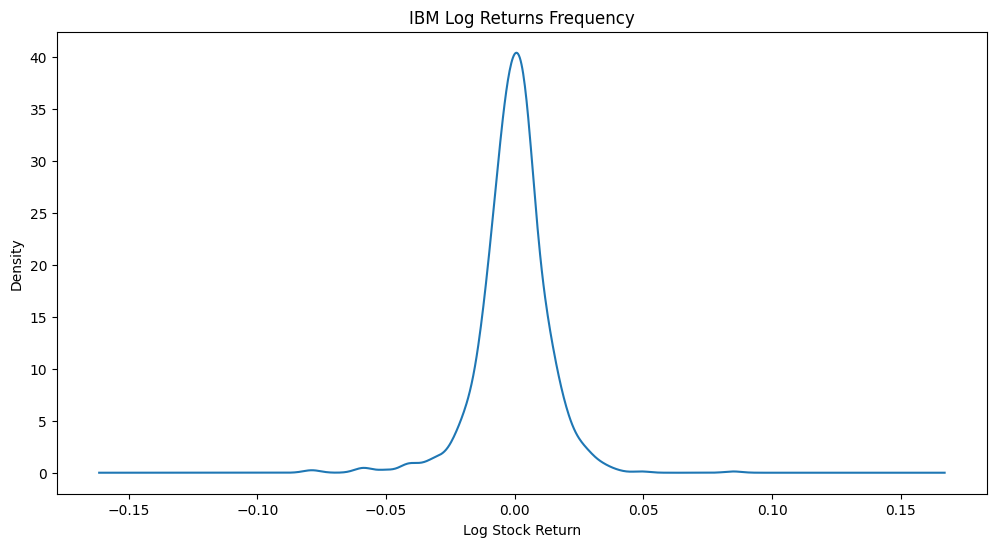

In [21]:
IBM_log_returns.plot(kind='kde', bw_method='scott', label='IBM', figsize=(12,6))
_=plt.xlabel('Log Stock Return')
_=plt.ylabel('Density')
_=plt.title('IBM Log Returns Frequency')

## Kernel Density Plot (Percent Change) with two Variables

The elaboration of the KDE plot is simple once the returns have been created. For this reason, the process is as follows (Fig. 13):


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


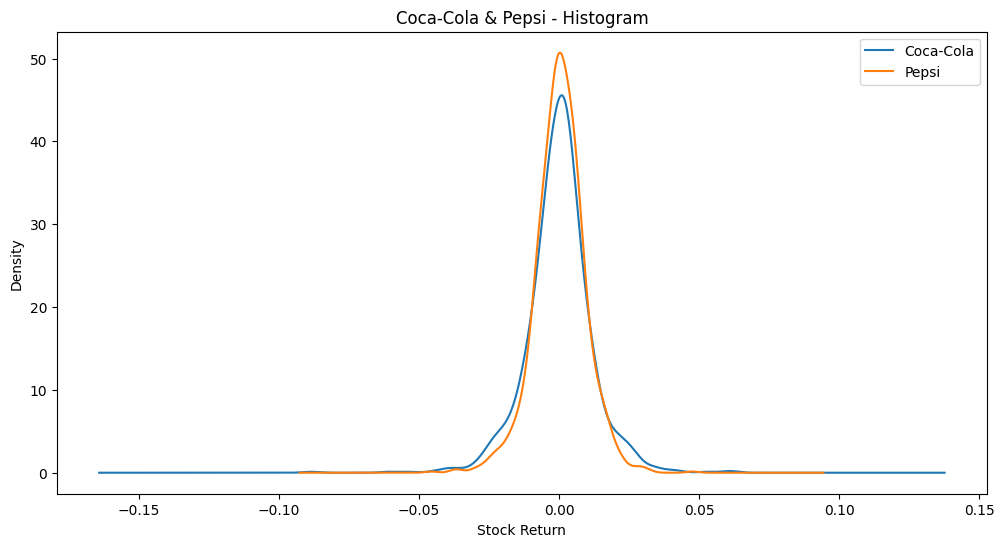

In [22]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2019,1,1)

CocaCola = yf.download('K', start, end)
Pepsi = yf.download('PEP', start, end)

CocaCola['Returns']= CocaCola['Close'].pct_change(1)
Pepsi['Returns'] = Pepsi['Close'].pct_change(1)

CocaCola['Returns'].plot(kind='kde', label='Coca-Cola', figsize=(12,6))
Pepsi['Returns'].plot(kind='kde', label='Pepsi')
_=plt.xlabel('Stock Return')
_=plt.ylabel('Density')
_=plt.title('Coca-Cola & Pepsi - Histogram')
plt.legend()

## Covariance and Correlation

When comparing stocks, the technical aspects are important to understand the behavior of the stock when trying to build a portfolio, but they can be subjective and often misunderstood. There is an interesting discussion concerning technical analysis and other types of financial analysis such as fundamental or econometric. It is important to understand the tool one is using to make the most out of it.

When trying to understand the relation between different asses there are two quantitative approaches that are very useful: covariance and correlation. Covariance is useful when comparing how two assets are related (Hayes 2019). It is also an important part of the Capital Asset Pricing Model (CAPM) that will be explained in future chapters. The equation of the covariance is as follows:

**Equation 10: Covariance**

Cov(Ra, Rb) = E{[Ra − E(Ra)][Rb − E(Rb)]}

To analyze the covariance between two stocks it is important to create a DataFrame. The process for calculating the covariance is as follows:


In [23]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2019,1,1)

Nutanix = yf.download('NTNX', start, end)
SP500 = yf.download('^GSPC', start, end)

Nutanix['Returns']=Nutanix['Close'].pct_change()
SP500['Returns']= SP500['Close'].pct_change()

Nutanix['Returns']=Nutanix['Returns'].dropna()
SP500['Returns']=SP500['Returns'].dropna()

Nutanix_SP500 = pd.concat([Nutanix['Returns'], SP500['Returns']], axis=1)
Nutanix_SP500.columns=['Nutanix Returns', 'SP500']

covariance = Nutanix_SP500.cov()
print(covariance)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                 Nutanix Returns     SP500
Nutanix Returns         0.001484  0.000119
SP500                   0.000119  0.000069


**Annualized Covariance matrix**

In [24]:
annual_covariance = Nutanix_SP500.cov()*252
print(annual_covariance)

                 Nutanix Returns     SP500
Nutanix Returns         0.373944  0.030055
SP500                   0.030055  0.017495


To interpret the covariance, one has to analyze if it is positive or negative, the same way it was done with the variance (Trochim 2020).

In this case the daily covariance is positive but the values are small which means that they move together but the relation is not strong.

When analyzing the annualized covariance, the same conclusion can be stated. For this it is important to calculate the correlation.

The correlation demonstrates how strong the relationship is between two variables, in this case, Nutanix and the S&P500. For determining correlation, the equation is as follows:

## **Equation 11: Correlation**

Given that the DataFrame Nutanix_SP500 was created before, the process is simple.


In [25]:
correlation = Nutanix_SP500.corr()

print(correlation)

                 Nutanix Returns     SP500
Nutanix Returns         1.000000  0.391875
SP500                   0.391875  1.000000


The correlation coefficient ranges from negative (−1.0) to positive (1.0) (Hayes 2019). When the correlation coefficient is negative (−1.0) it is said that the relation between variables is perfectly negative, which means that they behave contrarily. In the situation that the correlation is positive (1.0) then it is said that they behave perfect positive correlation, which means that they behave in the same way.

The rule of thumb of a strong correlation to be considered is if the value is 0.8 or above negative or positive.

In the example of Nutanix, the correlation is positive but it is not strong, since it is below 0.8. Therefore, there is no correlation to be considered between Nutanix and the S&P500.

The process can be elaborated with the f.fn() package with certain simplicity. Therefore it is explained as follows:


In [26]:
import ffn

stocks=ffn.get('NTNX:Close, spy:Close', start='2014-01-01', end='2019-01-01')
print(stocks.tail())

returns = stocks.to_returns()
print(returns.tail())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

            ntnxclose    spyclose
Date                             
2018-12-24  36.130001  234.339996
2018-12-26  38.919998  246.179993
2018-12-27  39.910000  248.070007
2018-12-28  40.270000  247.750000
2018-12-31  41.590000  249.919998
            ntnxclose  spyclose
Date                           
2018-12-24  -0.009323 -0.026423
2018-12-26   0.077221  0.050525
2018-12-27   0.025437  0.007677
2018-12-28   0.009020 -0.001290
2018-12-31   0.032779  0.008759


If the returns that are being planned on using are logarithmic returns, the process is as follows:


In [27]:
returns=stocks.to_log_returns()
print(returns.tail())

            ntnxclose  spyclose
Date                           
2018-12-24  -0.009366 -0.026778
2018-12-26   0.074385  0.049290
2018-12-27   0.025119  0.007648
2018-12-28   0.008980 -0.001291
2018-12-31   0.032253  0.008721


The process will continue with the logarithmic returns. To obtain the correlation matrix is as follows:

In [28]:
print(returns.corr())

           ntnxclose  spyclose
ntnxclose   1.000000  0.389009
spyclose    0.389009  1.000000


## Scatterplots and Heatmaps

There are two important tools when analyzing the process of comparing stocks. The first one is the scatterplot which will demonstrate the relation between variables, in this case the SP500 and Nutanix (Fig. 14).

To create a scatterplot with a histogram and therefore simplify the process of creating a histogram from scratch pandas has a scatter_matrix for plotting that can be visualized by using the following command:

### **• Creating a scatter matrix**


array([[<Axes: xlabel='Nutanix Returns', ylabel='Nutanix Returns'>,
        <Axes: xlabel='SP500', ylabel='Nutanix Returns'>],
       [<Axes: xlabel='Nutanix Returns', ylabel='SP500'>,
        <Axes: xlabel='SP500', ylabel='SP500'>]], dtype=object)

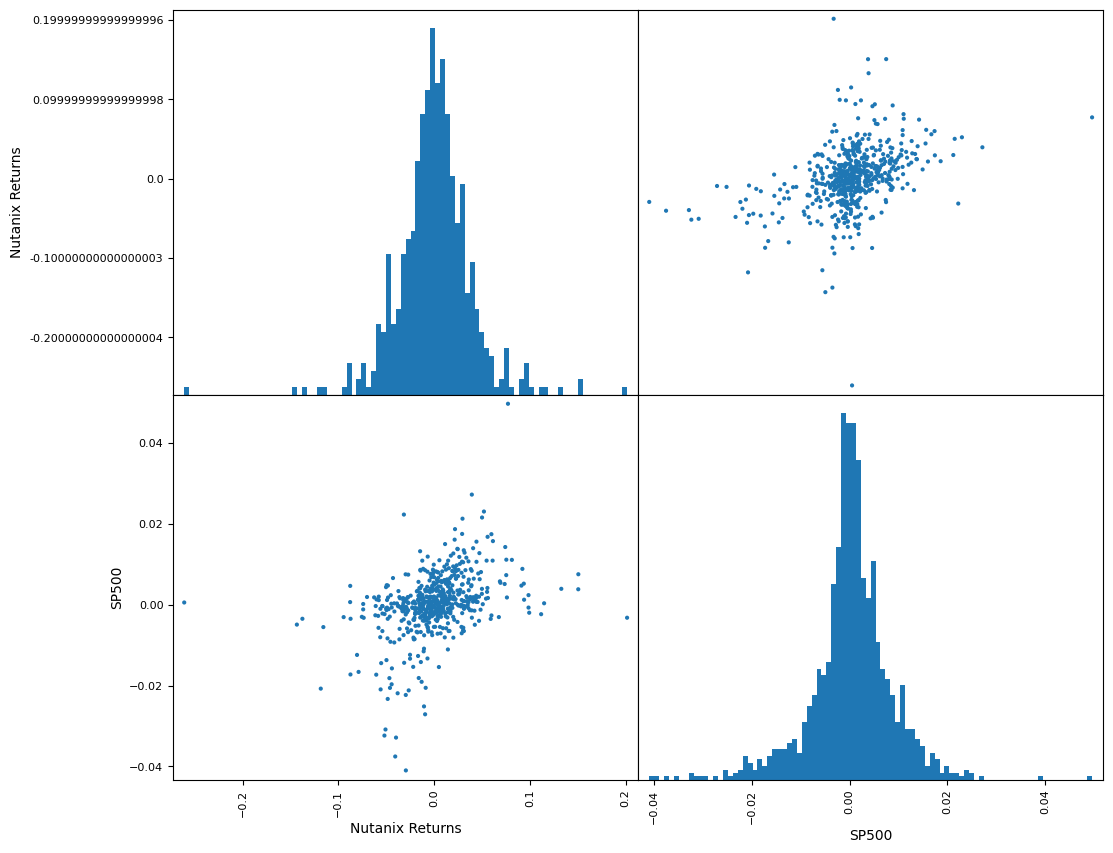

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(Nutanix_SP500, figsize=(12,10), alpha=1.0, hist_kwds={'bins':90})

The histogram can be adapted by changing the number of bins in the scatter matrix and the alpha can be changed for more transparency. If the only thing needed is the scatterplot, then the process should be as follows (Fig. 15):

### **• Creating a scatter plot**


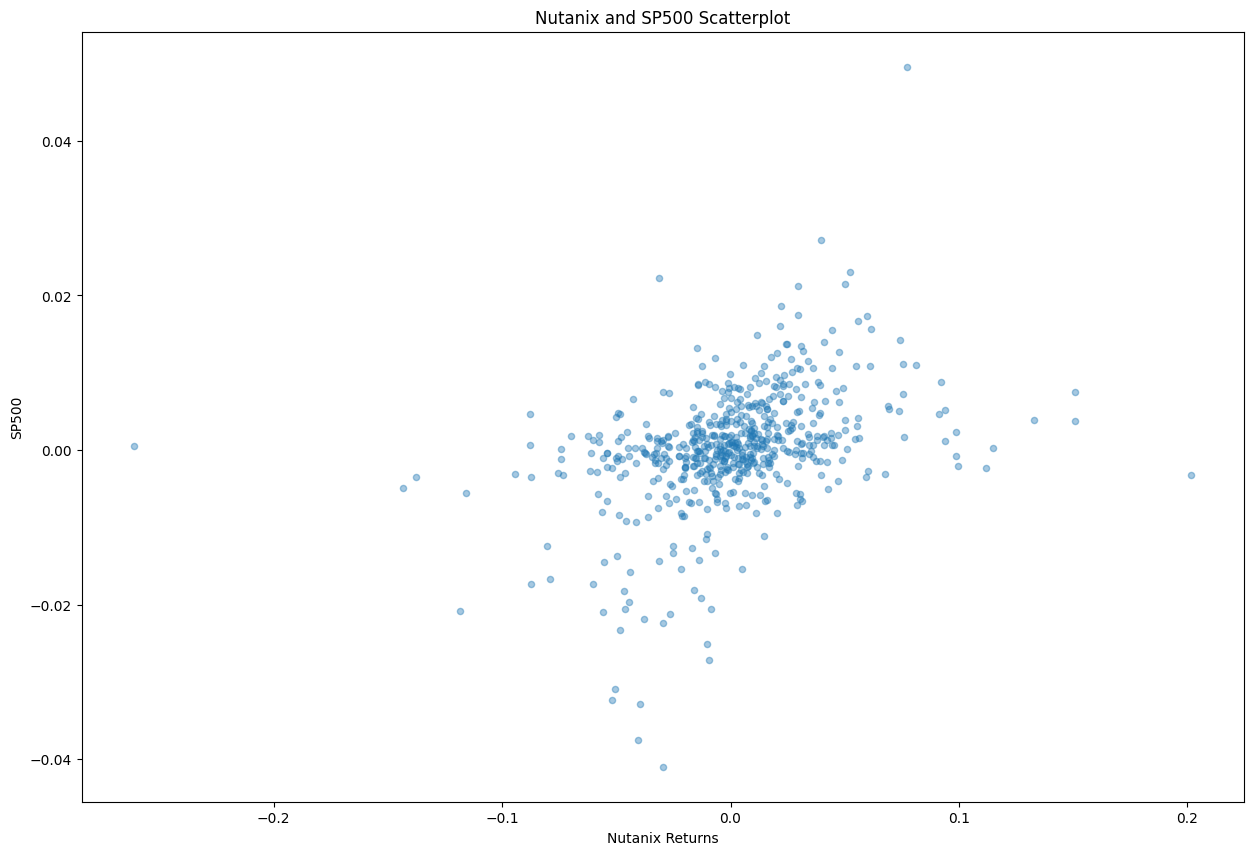

In [30]:
Nutanix_SP500.plot(kind='scatter', x = 'Nutanix Returns', y = 'SP500', alpha=0.4, figsize=(15,10))
_=plt.title('Nutanix and SP500 Scatterplot')

Another interesting way of demonstrating the relation between financial data is through a heatmap. 

A heatmap allows to understand the relation between variables and also scale them considering their relation. The process uses the seaborn library and is simple. It can be done as follows (Fig. 16):

### ***• Creating a heatmap***



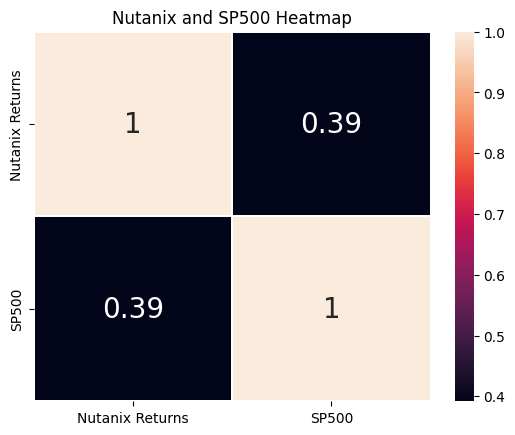

In [32]:
import seaborn as sns
sns.heatmap(correlation , annot=True , cmap=None, linewidths=0.3, annot_kws={"size":20})
_=plt.title('Nutanix and SP500 Heatmap')

The heatmap is a very useful tool since the color demonstrates the comparison between the different variables and the correlation is expressed in the boxes. When using different variables, which will the case of the following chapters, it is important to understand which visual representation is the most appropriate.

The process can be followed in f.fn() package in the following process:


            ntnxclose  spyclose
Date                           
2018-12-24  -0.009366 -0.026778
2018-12-26   0.074385  0.049290
2018-12-27   0.025119  0.007648
2018-12-28   0.008980 -0.001291
2018-12-31   0.032253  0.008721
           ntnxclose  spyclose
ntnxclose   1.000000  0.389009
spyclose    0.389009  1.000000


<module 'matplotlib.pyplot' from 'c:\\Users\\fvill\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

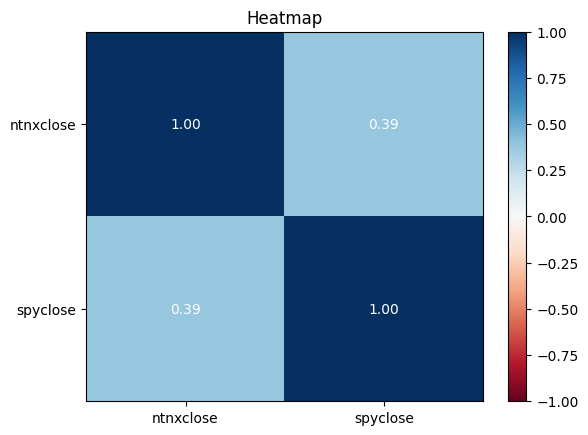

In [33]:
returns = stocks.to_log_returns()
print(returns.tail())
print(returns.corr())
returns.plot_corr_heatmap()